In [21]:
import pandas as pd

import numpy as np

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score
from sklearn.manifold import TSNE

from scipy.sparse import csr_matrix

import pickle

import plotly.express as px
import plotly.graph_objects as go


import matplotlib.pyplot as plt

## Data Exploration  

In [22]:
books_df = pd.read_csv("Books.csv", low_memory=False)
ratings_df = pd.read_csv("Ratings.csv")
users_df = pd.read_csv("Users.csv")

In [23]:
print("Books Columns:", books_df.columns.tolist())
print("Ratings Columns:", ratings_df.columns.tolist())
print("Users Columns:", users_df.columns.tolist())

Books Columns: ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
Ratings Columns: ['User-ID', 'ISBN', 'Book-Rating']
Users Columns: ['User-ID', 'Location', 'Age']


In [24]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [25]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [26]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


## Preprocessing


In [27]:
# Books DataFrame Preprocessing
books_df["Book-Author"].fillna("Unknown", inplace=True)
books_df["Publisher"].fillna("Unknown", inplace=True)
books_df["Image-URL-L"].fillna("No Image", inplace=True)
books_df["Year-Of-Publication"] = pd.to_numeric(books_df["Year-Of-Publication"], errors='coerce')
books_df["Year-Of-Publication"].fillna(books_df["Year-Of-Publication"].median(), inplace=True)
books_df["Year-Of-Publication"] = books_df["Year-Of-Publication"].astype(int)

books_df.drop(columns=["Image-URL-S", "Image-URL-M"], inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_43360\2434275220.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_df["Book-Author"].fillna("Unknown", inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_43360\2434275220.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [28]:
# Users DataFrame Preprocessing
users_df["Age"].fillna(users_df["Age"].median(), inplace=True)
users_df["Age"] = users_df["Age"].astype(int)

C:\Users\dell\AppData\Local\Temp\ipykernel_43360\745759555.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df["Age"].fillna(users_df["Age"].median(), inplace=True)


In [29]:
# Ratings DataFrame Preprocessing
explicit_ratings_df = ratings_df[ratings_df["Book-Rating"] != 0]

In [30]:
# Merge datasets
merged_df = explicit_ratings_df.merge(books_df, on="ISBN")

In [31]:
# Filter users and books with at least 10 ratings
ratings_count_per_user = merged_df["User-ID"].value_counts()
users_to_keep = ratings_count_per_user[ratings_count_per_user >= 10].index
filtered_users_df = merged_df[merged_df["User-ID"].isin(users_to_keep)]
ratings_count_per_book = filtered_users_df["Book-Title"].value_counts()
books_to_keep = ratings_count_per_book[ratings_count_per_book >= 10].index
final_df = filtered_users_df[filtered_users_df["Book-Title"].isin(books_to_keep)]

In [32]:
final_df.columns.tolist()

['User-ID',
 'ISBN',
 'Book-Rating',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-L']

In [33]:
# Save preprocessed data
final_df.to_csv("preprocessed_data.csv", index=False)
print("Preprocessed data saved to preprocessed_data.csv")

Preprocessed data saved to preprocessed_data.csv


## Pivot Making

In [34]:
# Create a pivot table and sparse matrix for the recommendation system.

book_pivot = final_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating').fillna(0)
book_sparse_matrix = csr_matrix(book_pivot)

In [35]:
# Save pivot table and sparse matrix
pd.to_pickle(book_pivot, "book_pivot.pkl")
pd.to_pickle(book_sparse_matrix, "book_sparse_matrix.pkl")
print("Pivot table and sparse matrix saved.")

Pivot table and sparse matrix saved.


## KNN Model 

In [36]:
# Train the KNN model using cosine similarity.

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(book_sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [37]:
# Save the trained model
with open('model_knn.pkl', 'wb') as f:
    pickle.dump(model_knn, f)
print("KNN model saved to model_knn.pkl")

# Save book titles
with open('book_titles.pkl', 'wb') as f:
    pickle.dump(book_pivot.index, f)
print("Book titles saved to book_titles.pkl")

KNN model saved to model_knn.pkl
Book titles saved to book_titles.pkl


### Model Testing

In [38]:
# Calculate precision@k and recall@k for a sample of books.

def evaluate_recommendations(book_name, pivot_table, model, k=5, threshold=7):
    if book_name not in pivot_table.index:
        return None, None
    book_id = pivot_table.index.get_loc(book_name)
    distances, indices = model.kneighbors(pivot_table.iloc[book_id,:].values.reshape(1, -1), n_neighbors=k+1)
    recommended_books = [pivot_table.index[indices.flatten()[i]] for i in range(1, len(distances.flatten()))]
    
    # Get users who rated the input book highly (above threshold)
    relevant_users = pivot_table.columns[pivot_table.loc[book_name] >= threshold]
    # Get books these users rated highly
    relevant_books = set()
    for user in relevant_users:
        high_rated_books = pivot_table.index[pivot_table[user] >= threshold].tolist()
        relevant_books.update(high_rated_books)
    relevant_books.discard(book_name)  # Remove the input book
    
    # Calculate precision and recall
    true_positives = len(set(recommended_books).intersection(relevant_books))
    precision = true_positives / len(recommended_books) if recommended_books else 0
    recall = true_positives / len(relevant_books) if relevant_books else 0
    return precision, recall

In [39]:
# Evaluate for test books
test_books = [
    "The Da Vinci Code",
    "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
    "To Kill a Mockingbird",
    "The Lovely Bones: A Novel",
    "Life of Pi"
]
results = []
for book in test_books:
    precision, recall = evaluate_recommendations(book, book_pivot, model_knn, k=5, threshold=7)
    if precision is not None:
        results.append({'Book': book, 'Precision@5': precision, 'Recall@5': recall})

eval_df = pd.DataFrame(results)

eval_df

,Book,Precision@5,Recall@5
0,The Da Vinci Code,1.0,0.001842
1,Harry Potter and the Sorcerer's Stone (Harry P...,1.0,0.001880
2,To Kill a Mockingbird,1.0,0.001968
3,The Lovely Bones: A Novel,1.0,0.001883
4,Life of Pi,1.0,0.002438


In [ ]:
# Precision@5 and Recall@5 Bar Chart
fig2 = go.Figure(data=[
    go.Bar(name='Precision@5', x=eval_df['Book'], y=eval_df['Precision@5'], marker_color='blue'),
    go.Bar(name='Recall@5', x=eval_df['Book'], y=eval_df['Recall@5'], marker_color='orange')
])
fig2.update_layout(
    title='Precision@5 and Recall@5 for Test Books',
    xaxis_title='Book Title',
    yaxis_title='Score',
    barmode='group',
    xaxis_tickangle=45
)
fig2.show()

In [41]:
# Display key metrics about the dataset and model.

print(f"Total books in dataset: {len(book_pivot.index)}")
print(f"Total users: {final_df['User-ID'].nunique()}")
print(f"Total ratings: {len(final_df)}")
print(f"Sparsity: {(1 - len(final_df) / (len(book_pivot.index) * final_df['User-ID'].nunique())) * 100:.2f}%")
print("\nAverage Precision@5:", eval_df['Precision@5'].mean())
print("Average Recall@5:", eval_df['Recall@5'].mean())

Total books in dataset: 3580
Total users: 6255
Total ratings: 85881
Sparsity: 99.62%

Average Precision@5: 1.0
Average Recall@5: 0.0020021660816109685


In [42]:
# Cluster Visualization using PCA
pca = PCA(n_components=2)
book_embeddings = pca.fit_transform(book_pivot.values)
pca_df = pd.DataFrame({
    'PC1': book_embeddings[:, 0],
    'PC2': book_embeddings[:, 1],
    'Book': book_pivot.index
})
fig3 = px.scatter(pca_df, x='PC1', y='PC2', text='Book', 
                 title='Book Clustering (PCA Reduced)',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'})
fig3.update_traces(textposition='top center', marker=dict(size=10))
fig3.show()

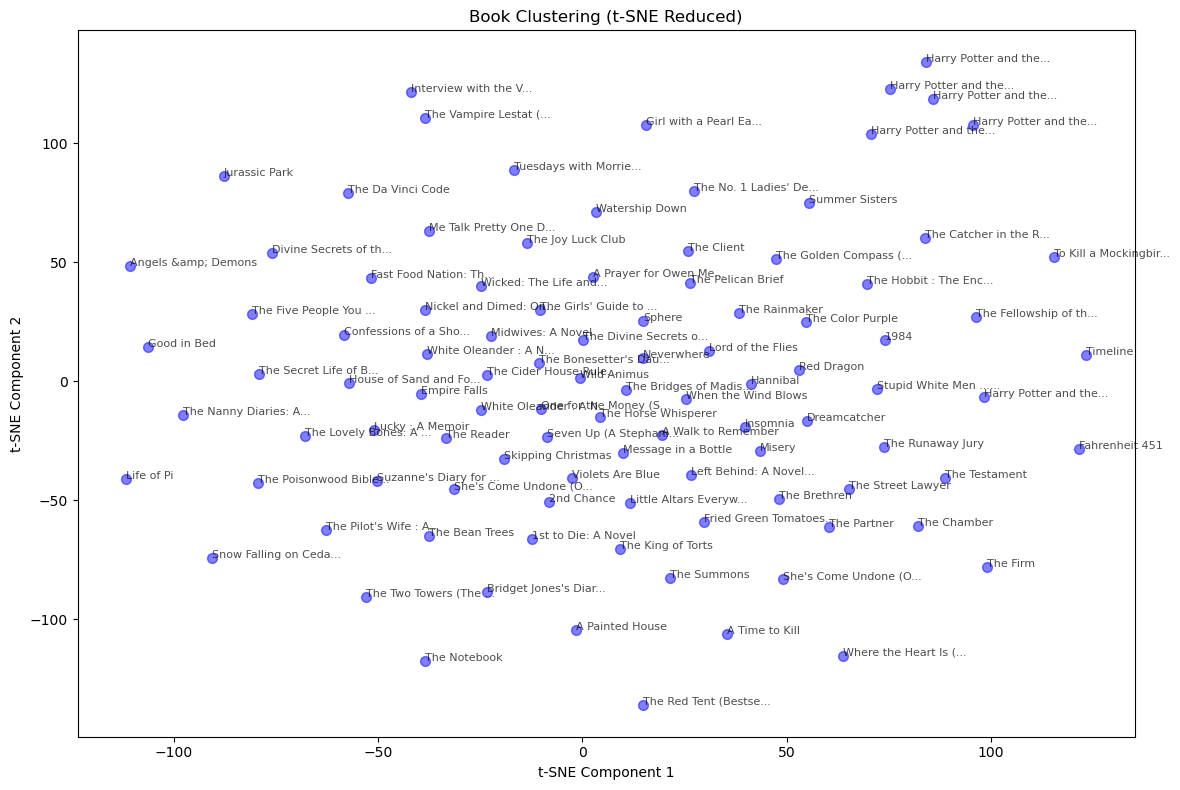

In [43]:
# Cluster Visualization using t-SNE with Matplotlib

top_books = final_df.groupby('Book-Title').count()['Book-Rating'].sort_values(ascending=False).head(100).index
sampled_pivot = book_pivot.loc[top_books]
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
book_embeddings = tsne.fit_transform(sampled_pivot.values)
plt.figure(figsize=(12, 8))
plt.scatter(book_embeddings[:, 0], book_embeddings[:, 1], s=50, c='blue', alpha=0.5)
# Use shortened titles (first 20 characters)
short_titles = [title[:20] + '...' if len(title) > 20 else title for title in sampled_pivot.index]
for i, title in enumerate(short_titles):
    plt.annotate(title, (book_embeddings[i, 0], book_embeddings[i, 1]), fontsize=8, alpha=0.7)
plt.title('Book Clustering (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()

In [44]:
# Functions to get top books and recommendations.

def get_top_20_books(df):
    top_books = df.groupby('Book-Title').count()['Book-Rating'].reset_index()
    top_books.rename(columns={'Book-Rating': 'num_ratings'}, inplace=True)
    top_books = top_books.sort_values('num_ratings', ascending=False).head(20)
    return top_books

def recommend_books(book_name, pivot_table, model, num_recommendations=5):
    if book_name not in pivot_table.index:
        return f"Book '{book_name}' not found in the dataset.", []
    book_id = pivot_table.index.get_loc(book_name)
    distances, indices = model.kneighbors(pivot_table.iloc[book_id,:].values.reshape(1, -1), n_neighbors=num_recommendations+1)
    recommendations = [pivot_table.index[indices.flatten()[i]] for i in range(1, len(distances.flatten()))]
    return f"Recommendations for '{book_name}'", recommendations

In [45]:
# Top 20 Books Bar Chart
top_20 = get_top_20_books(final_df)
fig1 = px.bar(top_20, x='Book-Title', y='num_ratings', 
              title='Top 20 Most Rated Books',
              labels={'num_ratings': 'Number of Ratings', 'Book-Title': 'Book Title'},
              color='num_ratings', color_continuous_scale='Viridis')
fig1.update_layout(xaxis_tickangle=45, showlegend=False)
fig1.show()

## Sample Test

In [46]:
# Test the recommendation system with sample books.

for book in test_books:
    message, recommendations = recommend_books(book, book_pivot, model_knn)
    print(f"\n{message}")
    if recommendations:
        print("Recommended:", ", ".join(recommendations[:3]), "...")
    else:
        print("No recommendations found.")


Recommendations for 'The Da Vinci Code'
Recommended: Angels &amp; Demons, Digital Fortress : A Thriller, Middlesex: A Novel ...

Recommendations for 'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))'
Recommended: Harry Potter and the Chamber of Secrets (Book 2), Harry Potter and the Prisoner of Azkaban (Book 3), Harry Potter and the Goblet of Fire (Book 4) ...

Recommendations for 'To Kill a Mockingbird'
Recommended: The Catcher in the Rye, The Edible Woman, Snow Falling on Cedars ...

Recommendations for 'The Lovely Bones: A Novel'
Recommended: Where the Heart Is (Oprah's Book Club (Paperback)), Lucky : A Memoir, The Da Vinci Code ...

Recommendations for 'Life of Pi'
Recommended: The Lovely Bones: A Novel, Girl with a Pearl Earring, The God of Small Things ...
